# Random Forest Model - combined genomes

## Imports

In [1]:
# Preprocessing and encoding variables
import pandas as pd
import numpy as np

# Using Skicit-learn to split data into training and testing sets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Visualising feature importance and making plots
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, roc_auc_score

In [2]:
G1 = pd.read_csv('../input/genomes-part1/G1.features.csv').iloc[:, 1:]
G2 = pd.read_csv('../input/genomes-part1/G2.features.csv').iloc[:, 1:]
G3 = pd.read_csv('../input/genomes-part1/G3.features.csv').iloc[:, 1:]
G4 = pd.read_csv('../input/genomes-part1/G4.features.csv').iloc[:, 1:]
G5 = pd.read_csv('../input/genomes-part1/G5.features.csv').iloc[:, 1:]
#G6 = pd.read_csv('../input/genomes/G6_translated.csv').iloc[:, 1:]
#G7 = pd.read_csv('../input/genomes/G7_translated.csv').iloc[:, 1:]
#G8 = pd.read_csv('../input/genomes/G8_translated.csv').iloc[:, 1:]
#G9 = pd.read_csv('../input/genomes/G9_translated.csv').iloc[:, 1:]
#G10 = pd.read_csv('../input/genomes/G10_translated.csv').iloc[:, 1:]
#G11 = pd.read_csv('../input/genomes/G11_translated.csv').iloc[:, 1:]
#G12 = pd.read_csv('../input/genomes/G12_translated.csv').iloc[:, 1:]
#G13 = pd.read_csv('../input/genomes/G13_translated.csv').iloc[:, 1:]
#G14 = pd.read_csv('../input/genomes/G14_translated.csv').iloc[:, 1:]
#G15 = pd.read_csv('../input/genomes/G15_translated.csv').iloc[:, 1:]

In [3]:
G1 = G1.sample(4000)
G2 = G2.sample(4000)
G3 = G3.sample(4000)
G4 = G4.sample(4000)
#G5 = G5.sample(4000)

In [4]:
frames = [G1, G2, G3, G4, G5]
G = pd.concat(frames)

#frames = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10]
#G = pd.concat(frames)

In [5]:
G = G.dropna()

In [6]:
G.tail(10)

,Type,Length,Dataset,Genome,GC_content,GC1_content,GC2_content,GC3_content,Start_ATG,Start_GTG,...,c_weight_TCG,c_weight_TCT,c_weight_TGA,c_weight_TGC,c_weight_TGG,c_weight_TGT,c_weight_TTA,c_weight_TTC,c_weight_TTG,c_weight_TTT
3656,CDS,3474,1,Campylobacter jejuni,0.425734,0.537997,0.369603,0.369603,0,0,...,0.112676,0.211268,0.0,0.400000,1,0.600000,0.451389,0.224490,0.201389,0.775510
3657,CDS,3510,1,Campylobacter jejuni,0.439601,0.582051,0.347009,0.389744,1,0,...,0.208333,0.166667,0.0,0.666667,1,0.333333,0.451852,0.250000,0.185185,0.750000
3658,CDS,3516,1,Campylobacter jejuni,0.489192,0.573379,0.398464,0.495734,1,0,...,0.118644,0.135593,1.0,0.619048,1,0.380952,0.383333,0.274510,0.241667,0.725490
3659,CDS,3975,1,Campylobacter jejuni,0.452579,0.544151,0.411321,0.402264,0,0,...,0.193182,0.261364,1.0,0.529412,1,0.470588,0.393939,0.222222,0.287879,0.777778
3660,CDS,4134,1,Campylobacter jejuni,0.454765,0.559507,0.372279,0.432511,0,1,...,0.214286,0.157143,1.0,0.285714,1,0.714286,0.375940,0.250000,0.300752,0.750000
3661,CDS,4179,1,Campylobacter jejuni,0.369466,0.464465,0.307968,0.335966,1,0,...,0.104167,0.281250,0.0,0.535714,1,0.464286,0.304348,0.200000,0.267081,0.800000
3662,CDS,4245,1,Campylobacter jejuni,0.479152,0.582332,0.390813,0.464311,0,0,...,0.176471,0.161765,0.0,0.636364,1,0.363636,0.395833,0.323529,0.263889,0.676471
3663,CDS,4839,1,Campylobacter jejuni,0.397396,0.482331,0.376937,0.332920,1,0,...,0.118110,0.220472,0.0,0.266667,1,0.733333,0.349398,0.234375,0.259036,0.765625
3664,CDS,4881,1,Campylobacter jejuni,0.425118,0.539029,0.354640,0.381684,0,0,...,0.197531,0.111111,1.0,0.142857,1,0.857143,0.488372,0.194444,0.250000,0.805556
3665,LORF,5205,1,Campylobacter jejuni,0.394813,0.472622,0.357349,0.354467,1,0,...,0.176000,0.248000,1.0,0.432432,1,0.567568,0.308458,0.195402,0.203980,0.804598


In [7]:
print('The shape of our dataframe is:', G.shape)
print('Rows:', G.shape[0])
print('Columns:', G.shape[1])

The shape of our dataframe is: (19666, 14791)
Rows: 19666
Columns: 14791


## Pre-processing / Data preparation

1. One-hot encoded categorical variables
2. Split data into features and labels
3. Convert to arrays
4. Split data into training and testing sets

### Encoding target values

In [8]:
def encode_feature(array):
    """ Encode a categorical array into a number array
    
    :param array: array to be encoded
    :return: numerical array
    """
  
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array)

In [9]:
class_names = ['CDS', 'LORF']
targets = G["Type"].values
print(targets)

['CDS' 'CDS' 'LORF' ... 'CDS' 'CDS' 'LORF']


In [10]:
targets = encode_feature(targets)
print(targets)

[0 0 1 ... 0 0 1]


In [11]:
print('The shape of our dataframe is:', G.shape)
print('Rows:', G.shape[0])
print('Columns:', G.shape[1])

The shape of our dataframe is: (19666, 14791)
Rows: 19666
Columns: 14791


### Selecting features and targets and converting data to arrays

In [12]:
# Labels are the values we want to predict
labels = targets

# Remove the labels from the features -> axis 1 refers to the columns
features = G.drop(['Type','Genome', 'Dataset'], axis = 1)

# Saving feature names as list for later use
feature_names = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [13]:
print('The shape of our features are:', features.shape)

The shape of our features are: (19666, 14788)


### Split into training and testing sets

In [14]:
# Split the data into training and testing sets -> x = features and y = labels/targets
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [15]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (14749, 14788)
Training Labels Shape: (14749,)
Testing Features Shape: (4917, 14788)
Testing Labels Shape: (4917,)


## Train model - best params RandomSearch

In [16]:
# Create a Gaussian Classifier
clf_rand = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', 
                             max_depth=20, bootstrap=False, random_state = 42)

# Train the model using the training sets
clf_rand.fit(train_x, train_y)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

## Make predictions on test set

In [17]:
pred_y = clf_rand.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))
# Precision, Recall and Roc_AUC score
#print("Precision score:", metrics.precision_score(test_y, pred_y))
#print("Recall score:", metrics.recall_score(test_y, pred_y))
#print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.8781777506609721


## Confusion matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


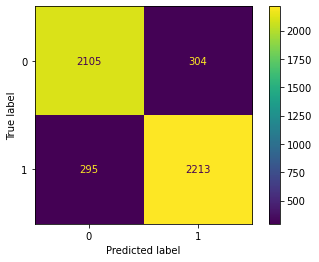

In [18]:
plot_confusion_matrix(clf_rand, test_x, test_y)  
plt.show()

#plt.savefig('confmatrix_g1_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

## Finding important features

1. Create a random forests model.
2. Use the feature importance variable to see feature importance scores.
3. Visualize these scores using the seaborn library.

In [19]:
feature_imp = pd.Series(clf_rand.feature_importances_, index = feature_names).sort_values(ascending=False)

In [20]:
feature_imp

Length          0.031264
1_aa_mer_E      0.009973
2_aa_mer_EL     0.009655
1_aa_mer_R      0.007654
2_aa_mer_LG     0.007389
                  ...   
3_aa_mer_V*R    0.000000
3_aa_mer_V*Q    0.000000
3_aa_mer_V*P    0.000000
3_aa_mer_V*N    0.000000
3_aa_mer_EI*    0.000000
Length: 14788, dtype: float64

In [21]:
features = feature_imp.to_frame()
features.columns = ['Feature importance']

In [22]:
features

,Feature importance
Length,0.031264
1_aa_mer_E,0.009973
2_aa_mer_EL,0.009655
1_aa_mer_R,0.007654
2_aa_mer_LG,0.007389
...,...
3_aa_mer_V*R,0.000000
3_aa_mer_V*Q,0.000000
3_aa_mer_V*P,0.000000
3_aa_mer_V*N,0.000000


In [23]:
# Grouping all k-mers
dimers = features[features.index.map(lambda x: "2_mer_" in x)]
trimers = features[features.index.map(lambda x: "3_mer_" in x)]
tetramers = features[features.index.map(lambda x: "4_mer_" in x)]
pentamers = features[features.index.map(lambda x: "5_mer_" in x)] 
hexamers = features[features.index.map(lambda x: "6_mer_" in x)]

# Grouping all aa-mers
single_aa = features[features.index.map(lambda x: "1_aa_mer_" in x)]
double_aa = features[features.index.map(lambda x: "2_aa_mer_" in x)]
triple_aa = features[features.index.map(lambda x: "3_aa_mer_" in x)]

# Grouping c_weights
c_weight = features[features.index.map(lambda x: "c_weight" in x)]

#### Mean feature importances of all k-mers, aa-mers and c_weights

In [24]:
data = {'Feature importance': [round(dimers.mean().iloc[0], 6), round(trimers.mean().iloc[0], 6), 
                               round(tetramers.mean().iloc[0], 6), round(pentamers.mean().iloc[0], 6), 
                               round(hexamers.mean().iloc[0], 6), round(single_aa.mean().iloc[0], 6), 
                               round(double_aa.mean().iloc[0], 6), round(triple_aa.mean().iloc[0], 6),
                               round(c_weight.mean().iloc[0], 6)]}

features_cond = pd.DataFrame(data, index = ['dimers', 'trimers', 'tetramers', 'pentamers', 'hexamers', 
                                            'single_aa', 'double_aa', 'triple_aa', 'c_weight'])

#### Sum of all feature importances of k-mers, aa-mers and c_weights

In [25]:
data = {'Feature importance': [round(dimers.sum().iloc[0], 6), round(trimers.sum().iloc[0], 6), 
                               round(tetramers.sum().iloc[0], 6), round(pentamers.sum().iloc[0], 6), 
                               round(hexamers.sum().iloc[0], 6), round(single_aa.sum().iloc[0], 6), 
                               round(double_aa.sum().iloc[0], 6), round(triple_aa.sum().iloc[0], 6),
                               round(c_weight.sum().iloc[0], 6)]}

features_cond2 = pd.DataFrame(data, index = ['dimers', 'trimers', 'tetramers', 'pentamers', 'hexamers', 
                                            'single_aa', 'double_aa', 'triple_aa', 'c_weight'])

In [26]:
features_cond

,Feature importance
dimers,0.000704
trimers,0.000629
tetramers,0.000448
pentamers,0.000189
hexamers,0.000041
single_aa,0.002822
double_aa,0.000479
triple_aa,0.000009
c_weight,0.001216


In [27]:
ind_list = ['GC_content', 'GC1_content', 'GC2_content', 'GC3_content', 
            'Start_ATG', 'Start_GTG', 'Start_TTG', 'Length']

features_condensed = features.loc[ind_list]

In [28]:
features_condensed

,Feature importance
GC_content,0.000711
GC1_content,0.003552
GC2_content,0.006942
GC3_content,0.003503
Start_ATG,0.006788
Start_GTG,0.000572
Start_TTG,0.003472
Length,0.031264


In [29]:
features_red = pd.concat([features_condensed, features_cond])
features_red = features_red.squeeze()

In [30]:
features_red = features_red.sort_values(ascending=False)
features_red

Length         0.031264
GC2_content    0.006942
Start_ATG      0.006788
GC1_content    0.003552
GC3_content    0.003503
Start_TTG      0.003472
single_aa      0.002822
c_weight       0.001216
GC_content     0.000711
dimers         0.000704
trimers        0.000629
Start_GTG      0.000572
double_aa      0.000479
tetramers      0.000448
pentamers      0.000189
hexamers       0.000041
triple_aa      0.000009
Name: Feature importance, dtype: float64

In [31]:
features_red2 = pd.concat([features_condensed, features_cond2])
features_red2 = features_red2.squeeze()

In [32]:
features_red2 = features_red2.sort_values(ascending=False)
features_red2

double_aa      0.201379
pentamers      0.193930
hexamers       0.167611
tetramers      0.114620
triple_aa      0.079857
c_weight       0.077827
single_aa      0.056443
trimers        0.040271
Length         0.031264
dimers         0.011258
GC2_content    0.006942
Start_ATG      0.006788
GC1_content    0.003552
GC3_content    0.003503
Start_TTG      0.003472
GC_content     0.000711
Start_GTG      0.000572
Name: Feature importance, dtype: float64

## Generating the model on selected features

After removing the least important features the accuracy may increase. This is because one removes misleading data and noise, resulting in increased accuracy. A lesser amount of features also reduces the training time.

Extra features can decrease performance because they may “confuse” the model by giving it irrelevant data that prevents it from learning the actual relationships. The random forest performs implicit feature selection because it splits nodes on the most important variables, but other machine learning models do not. One approach to improve other models is therefore to use the random forest feature importances to reduce the number of variables in the problem. In our case, we will use the feature importances to decrease the number of features for our random forest model, because, in addition to potentially increasing performance, reducing the number of features will shorten the run time of the model. 

Often with feature reduction, there will be a minor decrease in performance that must be weighed against the decrease in run-time. Machine learning is a game of making trade-offs, and run-time versus performance is usually one of the critical decisions.

In [33]:
feature_imp = pd.Series(clf_rand.feature_importances_, index = feature_names).sort_values(ascending=False)

In [34]:
selected = feature_imp.iloc[0:300]

In [35]:
selected_feat = list(selected.index)

In [36]:
important_indices = [feature_names.index(x) for x in selected_feat]

In [37]:
# Create a Gaussian Classifier
clf_imp = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', 
                             max_depth=10, bootstrap=False, random_state = 42)

# Select most important features
important_indices = [feature_names.index(x) for x in selected_feat]

train_important = train_x[:, important_indices]
test_important = test_x[:, important_indices]

In [38]:
# Train the random forest
clf_imp.fit(train_important, train_y)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=200,
                       random_state=42)

In [39]:
# Make predictions and determine the error
pred_y = clf_imp.predict(test_important)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))
# Precision, Recall and Roc_AUC score
print("Precision score:", metrics.precision_score(test_y, pred_y))
print("Recall score:", metrics.recall_score(test_y, pred_y))
#print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.9064470205409803
Precision score: 0.9317032040472175
Recall score: 0.8811802232854864


#### Confusion matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


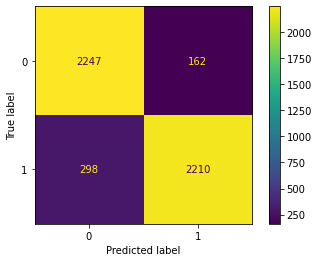

<Figure size 432x288 with 0 Axes>

In [40]:
plot_confusion_matrix(clf_imp, test_important, test_y)  
plt.show()

plt.savefig('confmatrix_g5.png', dpi=300, bbox_inches='tight', transparent=True)

After feature selection based on the most important features the metrics improved by 2%. In the confusion matrix we see that the clf_imp model generates much less false positives and slightly more false negatives. Meaning the accuracy, precision and ROC_AUC scores improve after feature selection and recall decreases slightly. 